In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [158]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Model
class NN_Sigmoid:
    def __init__(self, layers):
        self.layers = layers
        self.n = len(layers)
        self.A = [np.zeros((x, 1)) for x in layers] 
        self.B = [np.zeros((layers[i+1], 1)) for i in range(self.n - 1)]
        self.W = [np.random.normal(0, 0.1, size=(layers[i], layers[i+1])) for i in range(self.n - 1)]

    def forward(self, X):
        self.A[0] = X
        
        for i in range(self.n - 1):
            self.A[i+1] = sigmoid(self.W[i].T @ self.A[i] + self.B[i])

        return self.A[-1]  
    

# Optimizer
class GD_Sigmoid:
    def __init__(self, lr):
        self.lr = lr

    def step(self, model, X, y):
        y_pred = model.forward(X)
        Error = y - y_pred

        d_Error = -2 * Error

        for i in range(model.n-1, 0, -1):
            d_sigmoid = model.A[i] * (1 - model.A[i])
            
            d_B = d_Error * d_sigmoid
            d_W = model.A[i-1] @ (d_sigmoid * d_Error).T
            d_A = model.W[i-1] @ (d_sigmoid * d_Error)

            model.B[i-1] -= self.lr * d_B
            model.W[i-1] -= self.lr * d_W
            d_Error = d_A #* self.lr


In [159]:
nn = NN_Sigmoid([1, 2, 3, 2, 1])
optimizer = GD_Sigmoid(0.1)

X = np.array([[1]])
y = [0]

losses = []
iterations = 100

# before training
print(nn.forward(X))

for i in range(iterations):
    optimizer.step(nn, X, y)

    y_pred = nn.forward(X)
    loss = (y_pred - y) ** 2
    losses.append(loss)

# after training
print(nn.forward(X))
print("straty:", losses)

[[0.47684402]]
[[0.15551465]]
straty: [array([[0.2187911]]), array([[0.21055646]]), array([[0.20266924]]), array([[0.19512114]]), array([[0.18790285]]), array([[0.18100424]]), array([[0.17441457]]), array([[0.16812269]]), array([[0.16211716]]), array([[0.15638641]]), array([[0.15091882]]), array([[0.14570288]]), array([[0.14072722]]), array([[0.1359807]]), array([[0.13145246]]), array([[0.12713196]]), array([[0.123009]]), array([[0.11907377]]), array([[0.11531685]]), array([[0.1117292]]), array([[0.10830219]]), array([[0.1050276]]), array([[0.1018976]]), array([[0.09890472]]), array([[0.0960419]]), array([[0.09330243]]), array([[0.09067996]]), array([[0.08816846]]), array([[0.08576225]]), array([[0.08345594]]), array([[0.08124444]]), array([[0.07912294]]), array([[0.07708691]]), array([[0.07513205]]), array([[0.07325432]]), array([[0.07144988]]), array([[0.06971513]]), array([[0.06804665]]), array([[0.06644124]]), array([[0.06489584]]), array([[0.06340758]]), array([[0.06197375]]), arr

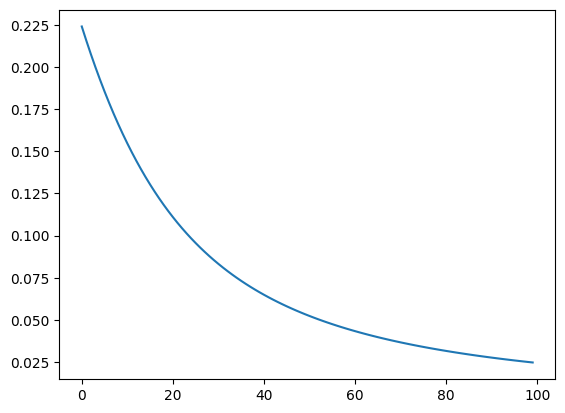

In [144]:
flat_losses = [loss[0] if isinstance(loss, np.ndarray) else loss for loss in losses]
plt.plot(flat_losses)

In [160]:
print(nn.W)
print(nn.A)
print(nn.B)

[array([[-0.09991361, -0.01154035]]), array([[-0.11725097, -0.0784998 ,  0.09913314],
       [ 0.14166718, -0.00733426,  0.03754538]]), array([[ 0.14867662,  0.03869122],
       [ 0.165075  ,  0.02260229],
       [-0.04210252,  0.17743843]]), array([[-0.65024737],
       [-0.59254473]])]
[array([[1]]), array([[0.4750111 ],
       [0.49714589]]), array([[0.50450775],
       [0.49061399],
       [0.5168253 ]]), array([[0.55681473],
       [0.55046651]]), array([[0.15551465]])]
[array([[-0.00012534],
       [ 0.00012378]]), array([[0.00329774],
       [0.00338604],
       [0.00157175]]), array([[0.09400771],
       [0.08024209]]), array([[-1.00374409]])]


**RELU NeuralNet**

In [508]:
def Relu(x):
    return np.maximum(0, x)

def d_Relu(x):
    return (x > 0).astype(float)

# Model
class NN_ReLu:
    def __init__(self, layers):
        self.layers = layers
        self.n = len(layers)
        self.A = [np.zeros((x, 1)) for x in layers] 
        #self.B = [np.zeros((layers[i+1], 1)) for i in range(self.n - 1)]
        self.B = [np.random.normal(0, np.sqrt(2 / layers[i+1]), size=(layers[i+1], 1)) for i in range(self.n - 1)]
        self.W = [np.random.randn(layers[i], layers[i+1]) * np.sqrt(2 / layers[i]) for i in range(self.n - 1)]

    def forward(self, X):
        self.A[0] = X
        for i in range(self.n - 1):
            #print(self.A[i+1].shape, self.A[i].shape,  self.W[i].shape, self.B[i].shape)
            self.A[i+1] = Relu(self.W[i].T @ self.A[i] + self.B[i])
            
        return self.A[-1] 
    

# Optimizer
class GD_ReLu:
    def __init__(self, lr):
        self.lr = lr

    def step(self, model, X, y):
        y_pred = model.forward(X)
        Error = y - y_pred

        d_Error = -2 * Error

        for i in range(model.n-1, 0, -1):
            d_relu = d_Relu(model.A[i])
            d_B = d_Error * d_relu
            d_W = model.A[i-1] @ (d_relu * d_Error).T
            d_A = model.W[i-1] @ (d_relu * d_Error)

            #print(d_B.shape, model.B[i].shape)

            model.B[i-1] -= self.lr * d_B
            model.W[i-1] -= self.lr * d_W

            d_Error = d_A


In [509]:
nn = NN_ReLu([1, 2, 2, 1])
optimizer = GD_ReLu(lr=0.1)

X = np.array([[1]])
y = [2]

losses = []
iterations = 10000

# before training
print(nn.forward(X))

for i in range(iterations):
    optimizer.step(nn, X, y)

    y_pred = nn.forward(X)
    loss = (y_pred - y) ** 2
    losses.append(loss)

# after training
print(nn.forward(X))
print("straty:", losses)

[[0.]]
[[0.]]
straty: [array([[4.]]), array([[4.]]), array([[4.]]), array([[4.]]), array([[4.]]), array([[4.]]), array([[4.]]), array([[4.]]), array([[4.]]), array([[4.]]), array([[4.]]), array([[4.]]), array([[4.]]), array([[4.]]), array([[4.]]), array([[4.]]), array([[4.]]), array([[4.]]), array([[4.]]), array([[4.]]), array([[4.]]), array([[4.]]), array([[4.]]), array([[4.]]), array([[4.]]), array([[4.]]), array([[4.]]), array([[4.]]), array([[4.]]), array([[4.]]), array([[4.]]), array([[4.]]), array([[4.]]), array([[4.]]), array([[4.]]), array([[4.]]), array([[4.]]), array([[4.]]), array([[4.]]), array([[4.]]), array([[4.]]), array([[4.]]), array([[4.]]), array([[4.]]), array([[4.]]), array([[4.]]), array([[4.]]), array([[4.]]), array([[4.]]), array([[4.]]), array([[4.]]), array([[4.]]), array([[4.]]), array([[4.]]), array([[4.]]), array([[4.]]), array([[4.]]), array([[4.]]), array([[4.]]), array([[4.]]), array([[4.]]), array([[4.]]), array([[4.]]), array([[4.]]), array([[4.]]), ar

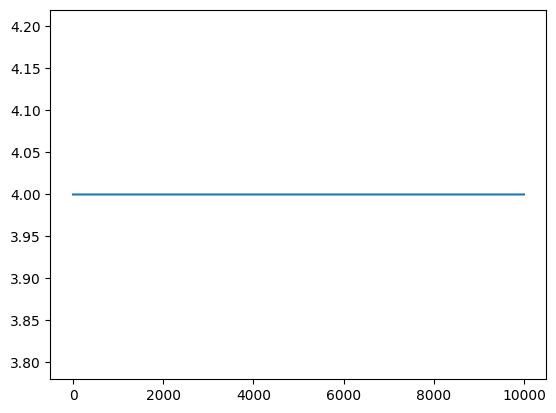

In [510]:
flat_losses = [loss[0] if isinstance(loss, np.ndarray) else loss for loss in losses]
plt.plot(flat_losses)

In [511]:
print(nn.W)
print(nn.A)
print(nn.B)

[array([[2.35569796, 0.56772471]]), array([[-0.60956456,  0.26327784],
       [ 1.02866022, -1.67968652]]), array([[-2.7607444 ],
       [ 1.26770884]])]
[array([[1]]), array([[2.76682574],
       [0.84886862]]), array([[0.],
       [0.]]), array([[0.]])]
[array([[0.41112778],
       [0.2811439 ]]), array([[ 0.56028055],
       [-0.88638132]]), array([[-0.23301178]])]


in ReLu version there is a problem with gradients = 0, so few neurons aren't activated. Maybe using more iterations will help. No, it didn't help

**Lets use Leaky ReLu, so neurons wont be equal to 0:**

In [518]:
def Leaky_Relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def d_Leaky_Relu(x, alpha=0.01):
    return np.where(x > 0, 1, alpha)  # Gradient is not to equal 0


# Model
class NN_Leaky_ReLu:
    def __init__(self, layers):
        self.layers = layers
        self.n = len(layers)
        self.A = [np.zeros((x, 1)) for x in layers] 
        self.B = [np.zeros((layers[i+1], 1)) for i in range(self.n - 1)]
        #self.B = [np.random.normal(0, np.sqrt(2 / layers[i+1]), size=(layers[i+1], 1)) for i in range(self.n - 1)]
        self.W = [np.random.randn(layers[i], layers[i+1]) * np.sqrt(2 / layers[i]) for i in range(self.n - 1)]

    def forward(self, X):
        self.A[0] = X
        for i in range(self.n - 1):
            #print(self.A[i+1].shape, self.A[i].shape,  self.W[i].shape, self.B[i].shape)
            self.A[i+1] = Leaky_Relu(self.W[i].T @ self.A[i] + self.B[i])
            
        return self.A[-1] 
    

# Optimizer
class GD_Leaky_ReLu:
    def __init__(self, lr):
        self.lr = lr

    def step(self, model, X, y):
        y_pred = model.forward(X)
        Error = y - y_pred

        d_Error = -2 * Error

        for i in range(model.n-1, 0, -1):
            d_leaky_relu = d_Leaky_Relu(model.A[i])
            d_B = d_Error * d_leaky_relu
            d_W = model.A[i-1] @ (d_leaky_relu * d_Error).T
            d_A = model.W[i-1] @ (d_leaky_relu * d_Error)

            #print(d_B.shape, model.B[i].shape)

            model.B[i-1] -= self.lr * d_B
            model.W[i-1] -= self.lr * d_W

            d_Error = d_A


In [578]:
nn = NN_Leaky_ReLu([1, 2, 3, 2, 1])
optimizer = GD_Leaky_ReLu(lr=0.001)

X = np.array([[1]])
y = [100]

losses = []
iterations = 1000

# before training
print(nn.forward(X))

for i in range(iterations):
    optimizer.step(nn, X, y)

    y_pred = nn.forward(X)
    loss = (y_pred - y) ** 2
    losses.append(loss)

# after training
print(nn.forward(X))
print("straty:", losses)

[[-0.00245926]]
[[100.]]
straty: [array([[10000.48121589]]), array([[10000.47062819]]), array([[10000.4600934]]), array([[10000.44961071]]), array([[10000.43917932]]), array([[10000.42879845]]), array([[10000.41846731]]), array([[10000.40818514]]), array([[10000.39795117]]), array([[10000.38776466]]), array([[10000.37762487]]), array([[10000.36753106]]), array([[10000.35748252]]), array([[10000.34747853]]), array([[10000.33751839]]), array([[10000.3276014]]), array([[10000.31772688]]), array([[10000.30789414]]), array([[10000.29810252]]), array([[10000.28835135]]), array([[10000.27863999]]), array([[10000.26896777]]), array([[10000.25933407]]), array([[10000.24973824]]), array([[10000.24017967]]), array([[10000.23065774]]), array([[10000.22117183]]), array([[10000.21172135]]), array([[10000.20230568]]), array([[10000.19292425]]), array([[10000.18357647]]), array([[10000.17426175]]), array([[10000.16497954]]), array([[10000.15572925]]), array([[10000.14651034]]), array([[10000.13732224]

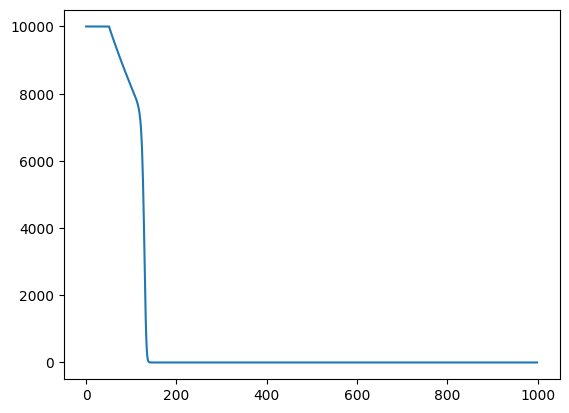

In [579]:
flat_losses = [loss[0] if isinstance(loss, np.ndarray) else loss for loss in losses]
plt.plot(flat_losses)

In [571]:
print(nn.W)
print(nn.A)
print(nn.B)

[array([[-1.68041295, -0.67342481]]), array([[-0.63753561,  1.32805353, -1.13535917],
       [-0.63814423, -0.96644624, -0.7218683 ]]), array([[-0.46544769,  0.72582649],
       [-0.21059027, -0.25849458],
       [ 0.05182888,  3.08898037]]), array([[-0.57252312],
       [ 5.82958167]])]
[array([[1]]), array([[-0.01710384],
       [-0.00696159]]), array([[ 7.26966416e-01],
       [-3.18029612e-04],
       [ 3.09001541e+00]]), array([[-6.18466646e-03],
       [ 1.65738558e+01]]), array([[100.00121183]])]
[array([[-0.02997073],
       [-0.02273405]]), array([[ 0.71161961],
       [-0.01581615],
       [ 3.06557106]]), array([[-0.44032081],
       [ 6.50112515]]), array([[3.37902515]])]
